# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
# your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sn

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee=pd.read_csv(r"C:\Users\Portu\Documents\Ironhack\Week_4\lab-pivot-table-and-correlation\your_code\data\Employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
employee.groupby(["Department"]).agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary','Years'])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary','Name'], aggfunc = ['mean','count'])

mean count       
                     Salary  Name Salary
Department Title                        
HR         VP          70.0     1      1
           analyst     32.5     2      2
IT         VP          70.0     1      1
           analyst     32.5     2      2
           associate   60.0     1      1
Sales      associate   55.0     2      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary'], aggfunc = ['mean','min','max','std'])

mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [19]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [18]:
# your answer here
employee.pivot_table(index=["Department"], aggfunc={"Name":"count","Salary":"sum"})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [19]:
# your answer here
employee.pivot_table(index=["Department","Title"], aggfunc={"Years":"sum","Salary":"mean"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [22]:
# your answer here

fitbit=pd.read_csv(r'C:\Users\Portu\Documents\Ironhack\Week_4\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [23]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [24]:
# your answer here
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
import statsmodels.api as sm
X = fitbit['Steps']
y = fitbit['Minutes Very Active']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Minutes Very Active   R-squared:                       0.327
Model:                             OLS   Adj. R-squared:                  0.325
Method:                  Least Squares   F-statistic:                     177.0
Date:                 Mon, 09 Nov 2020   Prob (F-statistic):           3.36e-33
Time:                         22:32:12   Log-Likelihood:                -1708.1
No. Observations:                  367   AIC:                             3420.
Df Residuals:                      365   BIC:                             3428.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6670      2.752      1.332      0.184      -1.745       9.079
Steps          0.0032      0.000     13.304      0.000       0.003       0.004
==============================================================================
Omnibus:                       85.633   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.655
Skew:                           1.230   Prob(JB):                     3.23e-38
Kurtosis:                       5.289   Cond. No.                     2.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

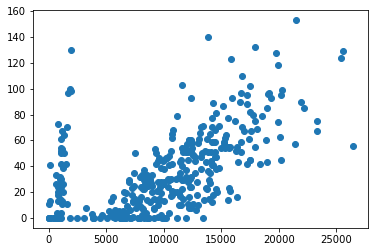

In [29]:
# your answer here

plt.scatter(x=fitbit["Steps"],y=fitbit["Minutes Very Active"])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

"""
There is a direct relationship between Minute Very Active and Steps. But as we saw in the model, that is not super strong.
""""

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
X = sm.add_constant(X)
X = fitbit[['Steps']]
y = fitbit['Minutes Sedentary']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Minutes Sedentary   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                              621.3
Date:                Mon, 09 Nov 2020   Prob (F-statistic):                    7.08e-81
Time:                        22:33:39   Log-Likelihood:                         -2707.8
No. Observations:                 367   AIC:                                      5418.
Df Residuals:                     366   BIC:                                      5421.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Steps          0.0437      0.002     24.927      0.000       0.040       0.047
==============================================================================
Omnibus:                        8.021   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.910
Skew:                          -0.094   Prob(JB):                       0.0858
Kurtosis:                       2.465   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

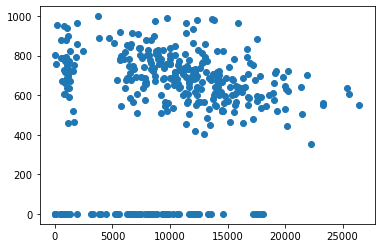

In [31]:
# your answer here
plt.scatter(x=fitbit["Steps"],y=fitbit["Minutes Sedentary"])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [32]:
# your answer here
X = sm.add_constant(X)
X = fitbit[['Steps']]
y = fitbit['MinutesOfSleep']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         MinutesOfSleep   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              662.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):                    3.83e-84
Time:                        22:33:49   Log-Likelihood:                         -2458.3
No. Observations:                 367   AIC:                                      4919.
Df Residuals:                     366   BIC:                                      4923.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Steps          0.0228      0.001     25.743      0.000       0.021       0.025
==============================================================================
Omnibus:                        4.952   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.332
Skew:                          -0.190   Prob(JB):                        0.115
Kurtosis:                       2.628   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

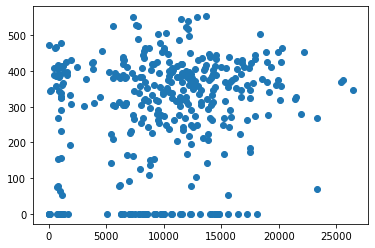

In [33]:
# your answer here
plt.scatter(x=fitbit["Steps"],y=fitbit['MinutesOfSleep'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [46]:
# your answer here
cor_fit=fitbit.corr()
cor_fit

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


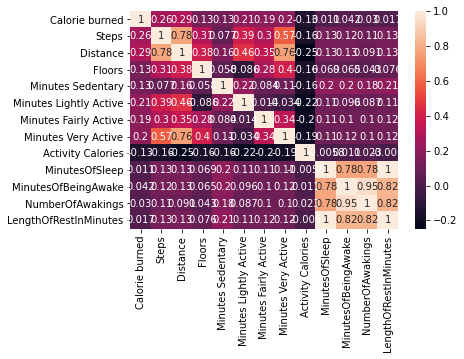

In [48]:
sn.heatmap(cor_fit, annot=True)
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [1]:
# your answer here
#Steps-distance(The light color one.)

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [49]:
# your answer here
time_grades=pd.read_csv(r'C:\Users\Portu\Documents\Ironhack\Week_4\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

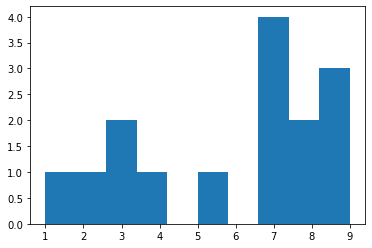

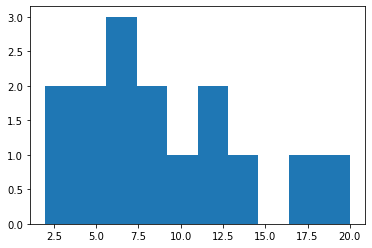

In [53]:
# your answer here
plt.hist(time_grades["Grade"])
plt.show()
plt.hist(time_grades["Study time"])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [55]:
# your answer here
import scipy.stats
print(scipy.stats.pearsonr(time_grades["Study time"], time_grades["Grade"]))
print(scipy.stats.spearmanr(time_grades["Study time"], time_grades["Grade"]))

(0.7980456073578857, 0.0003627635256342742)
SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


In [ ]:
#It looks there is a positive and strong relationship between study time and grade. 

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

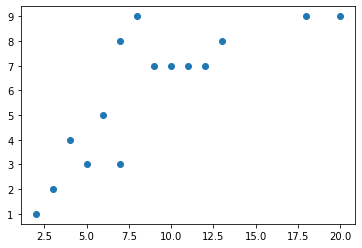

In [59]:
# your answer here
x=time_grades["Study time"]
y=time_grades["Grade"]

plt.scatter(x,y)

#The graph shows the positive- relationship

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
""""
The Pearson correlation provides the direction and strength 
of the relationship while the Spearman is not looking for a linear 
relationship but monotonic. Spearman does it by comparing 
the rank.
""""